Intensity Weighting
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new Bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101))

<ParameterSet: 73 parameters | contexts: compute, figure, constraint, dataset>

Relevant Parameters 
-------------------------------

In [4]:
b['intens_weighting']

<Parameter: intens_weighting=energy | keys: description, choices, value, visible_if, copy_for, readonly, advanced, latexfmt>

In [5]:
print(b['intens_weighting'])

Parameter: intens_weighting@lc01@dataset
                       Qualifier: intens_weighting
                     Description: Whether passband intensities are weighted by energy or photons
                           Value: energy
                         Choices: energy, photon
                  Constrained by: 
                      Constrains: None
                      Related to: None



Influence on Light Curves (fluxes)
---------------------------------------------

Let's (roughtly) reproduce Figure 5 from [Prsa et al. 2016](http://phoebe-project.org/publications/2016Prsa+) which shows the difference between photon and energy intensity weighting.

<img src="prsa+2016_fig5.png" alt="Figure 8" width="600px"/>

In [6]:
for teff_primary in [5000,7500,10000,12500,15000]:
    b['teff@primary'] = teff_primary
    b['teff@secondary'] = 0.9 * teff_primary
    
    for weighting in ['energy', 'photon']:
        b['intens_weighting'] = weighting
        b.run_compute(irrad_method='none', model='{}_{}'.format(teff_primary, weighting))

100%|██████████| 101/101 [00:01<00:00, 84.25it/s]
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING ld_mode_bol of 'lookup' uses a bolometric passband which is not reliable for hot stars.  Consider using ld_mode_bol of manual and providing ld_coeffs instead.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=10000K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING ld_mode_bol of 'lookup' uses a bolometric passband which is not reliable for hot stars.  Consider using ld_mode_bol of manual and providing ld_coeffs instead.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=10000K>8000K), for which gravb_bol>=0.9 might be a better approx th

Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=12500K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=11250K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=12500K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=11250K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING ld_mode_bol of 'lookup' uses a bolometric passband which is not reliable for hot stars.  Consider using ld_mode_bol of manual and providing ld_coeffs instead.
Thu, 17 Sep 2020 

Thu, 17 Sep 2020 11:02 BUNDLE       WARNING ld_mode_bol of 'lookup' uses a bolometric passband which is not reliable for hot stars.  Consider using ld_mode_bol of manual and providing ld_coeffs instead.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=15000K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=13500K>8000K), for which gravb_bol>=0.9 might be a better approx than gravb_bol=0.32.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'primary' probably has a radiative atm (teff=15000K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
Thu, 17 Sep 2020 11:02 BUNDLE       WARNING 'secondary' probably has a radiative atm (teff=13500K>=8000K), for which irrad_frac_refl_bol>0.8 (suggestion: 1.0) might be a better approx than irrad_frac_refl_bol=0.60.
100%|██████████| 

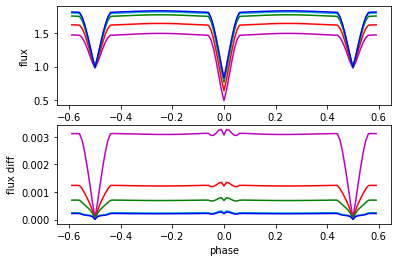

In [7]:
teff_colormap = {5000: 'm', 7500: 'r', 10000: 'g', 12500: 'c', 15000: 'b'}

fig = plt.figure()
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)

for teff, color in teff_colormap.items():
    fluxes_energy = b.get_value('fluxes@{}_energy'.format(teff))
    fluxes_photon = b.get_value('fluxes@{}_photon'.format(teff))
    phases = b.to_phase('times@lc@dataset')
    
    # alias data from -0.6 to 0.6
    fluxes_energy = np.append(fluxes_energy, fluxes_energy[abs(phases) > 0.4])
    fluxes_photon = np.append(fluxes_photon, fluxes_photon[abs(phases) > 0.4])
    phases = np.append(phases, phases[abs(phases)>0.4]+1.0)
    phases[phases > 1.0] = phases[phases > 1.0] - 2.0
    
    sort = phases.argsort()
    phases = phases[sort]
    fluxes_energy = fluxes_energy[sort]
    fluxes_photon = fluxes_photon[sort]
    
    ax1.plot(phases, fluxes_energy, color=color)
    ax2.plot(phases, fluxes_photon-fluxes_energy, color=color)

lbl = ax1.set_xlabel('')
lbl = ax1.set_ylabel('flux')
lbl = ax2.set_xlabel('phase')
lbl = ax2.set_ylabel('flux diff')